In [1]:
import pandas as pd
#Change the data type of Date Column using parse_dates attribute; & Set the Date Column as index.
df = pd.read_csv(r"C:\Users\divya\Statistics\Time_Series_DataAnalysis\aapl.csv",parse_dates=["Date"], index_col ="Date")
df.head(3)

C:\Users\divya\AppData\Local\Temp\ipykernel_23780\1583574195.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(r"C:\Users\divya\Statistics\Time_Series_DataAnalysis\aapl.csv",parse_dates=["Date"], index_col ="Date")


,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557


In [2]:
df.index

DatetimeIndex(['2017-07-07', '2017-07-06', '2017-07-05', '2017-07-03',
               '2017-06-30', '2017-06-29', '2017-06-28', '2017-06-27',
               '2017-06-26', '2017-06-23',
               ...
               '2016-07-22', '2016-07-21', '2016-07-20', '2016-07-19',
               '2016-07-18', '2016-07-15', '2016-07-14', '2016-07-13',
               '2016-07-12', '2016-07-11'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [10]:
#Retreive Jan 2017 Data

In [3]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [4]:
df.index

DatetimeIndex(['2017-07-07', '2017-07-06', '2017-07-05', '2017-07-03',
               '2017-06-30', '2017-06-29', '2017-06-28', '2017-06-27',
               '2017-06-26', '2017-06-23',
               ...
               '2016-07-22', '2016-07-21', '2016-07-20', '2016-07-19',
               '2016-07-18', '2016-07-15', '2016-07-14', '2016-07-13',
               '2016-07-12', '2016-07-11'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

When you set the date column as the index of your DataFrame in pandas, you can no longer access it directly using square brackets ([]). Instead, you'll need to use the .loc[] indexer to access rows based on the index values

In [5]:
df.loc['2017-01']

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-31,121.15,121.39,120.62,121.35,49200993
2017-01-30,120.93,121.63,120.66,121.63,30377503
2017-01-27,122.14,122.35,121.60,121.95,20562944
2017-01-26,121.67,122.44,121.60,121.94,26337576
2017-01-25,120.42,122.10,120.28,121.88,32586673
2017-01-24,119.55,120.10,119.50,119.97,23211038
2017-01-23,120.00,120.81,119.77,120.08,22050218
2017-01-20,120.45,120.45,119.73,120.00,32597892
2017-01-19,119.40,120.09,119.37,119.78,25597291


In [6]:
#Avg stock price of Apple in January 2017
df.loc['2017-01'].Close.mean()

119.57000000000001

The error message "Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed" typically occurs when you try to perform value-based slicing on a DataFrame with a DatetimeIndex that is not in ascending or descending order, or when the specified keys (dates) do not exist in the index.

Non-monotonic DatetimeIndex: A DatetimeIndex is considered monotonic if its values are either strictly increasing or strictly decreasing. When slicing or indexing data based on a DatetimeIndex, pandas expects the index to be in monotonic order to ensure efficient retrieval of data.

Value-based partial slicing: This refers to slicing based on specific values (e.g., dates) rather than using positional indexing. Partial slicing typically involves specifying start and end values for the slice.
Non-existing keys: This means that the keys (dates) you provided for slicing do not exist in the index of the DataFrame.

Ensure Monotonicity: Make sure that your DatetimeIndex is in either ascending or descending order. If it's not, you can use the sort_index() method to sort the index:


In [7]:
#When using .loc[] to slice data based on a date index in pandas, it's important to ensure that the start date comes before the end date in your slice notation. Additionally, ensure that the dates are in the correct format.
df.sort_index(inplace=True)
df.loc["2017-01-01":"2017-01-07"]

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,115.80,116.33,114.76,116.15,28781865
2017-01-04,115.85,116.51,115.75,116.02,21118116
2017-01-05,115.92,116.86,115.81,116.61,22193587
2017-01-06,116.78,118.16,116.47,117.91,31751900


In [9]:
#ReSampling to Monthly Frequency
#Want to know monthly stock data
df.Close.resample('M').mean()

C:\Users\divya\AppData\Local\Temp\ipykernel_23780\3584051719.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.Close.resample('M').mean()


Date
2016-07-31     99.473333
2016-08-31    107.665217
2016-09-30    110.857143
2016-10-31    115.707143
2016-11-30    110.154286
2016-12-31    114.335714
2017-01-31    119.570000
2017-02-28    133.713684
2017-03-31    140.617826
2017-04-30    142.886842
2017-05-31    152.227727
2017-06-30    147.831364
2017-07-31    143.625000
Freq: ME, Name: Close, dtype: float64

C:\Users\divya\AppData\Local\Temp\ipykernel_23780\4123725665.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.Close.resample('M').mean().plot()


<Axes: xlabel='Date'>

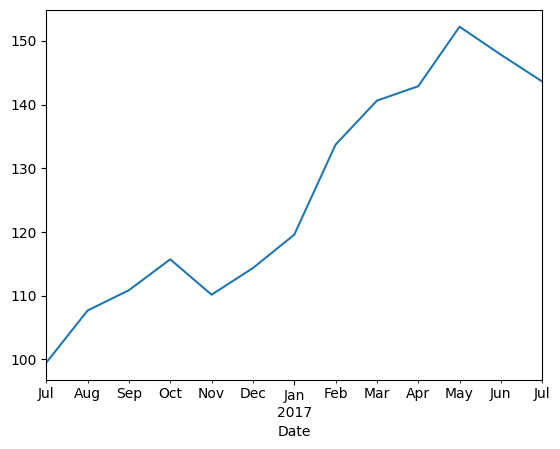

In [10]:
df.Close.resample('M').mean().plot()

C:\Users\divya\AppData\Local\Temp\ipykernel_23780\3119381793.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df.Close.resample('Q').mean().plot()


<Axes: xlabel='Date'>

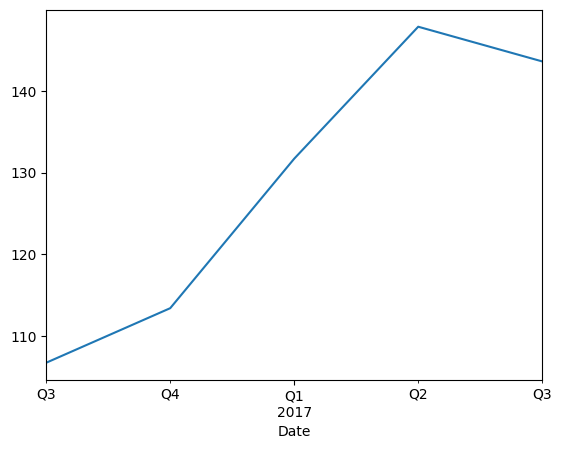

In [12]:
#quarterly
df.Close.resample('Q').mean().plot()

C:\Users\divya\AppData\Local\Temp\ipykernel_23780\3576416301.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df.Close.resample('Q').mean().plot(kind="bar")


<Axes: xlabel='Date'>

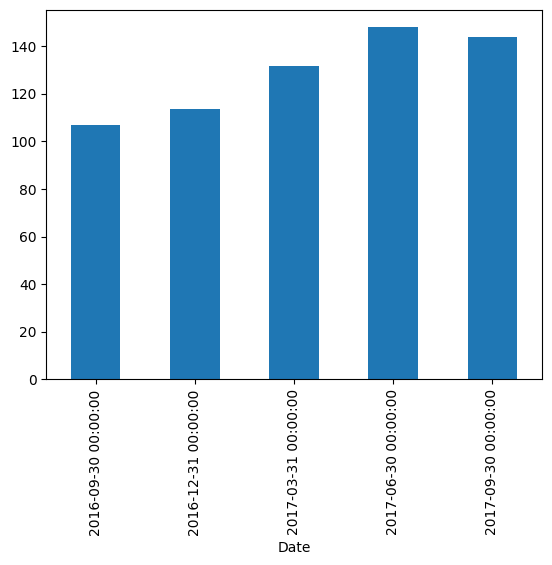

In [17]:
#quarterly
%matplotlib inline
df.Close.resample('Q').mean().plot(kind="bar")

C:\Users\divya\AppData\Local\Temp\ipykernel_23780\3189526837.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df.Close.resample('Q').mean().plot()


<Axes: xlabel='Date'>

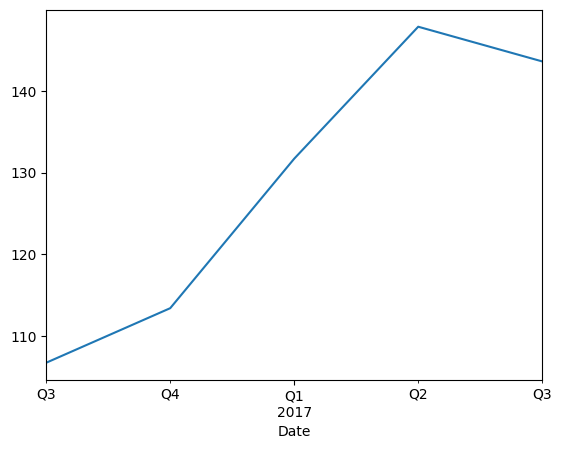

In [18]:
df.Close.resample('Q').mean().plot()

<Axes: xlabel='Date'>

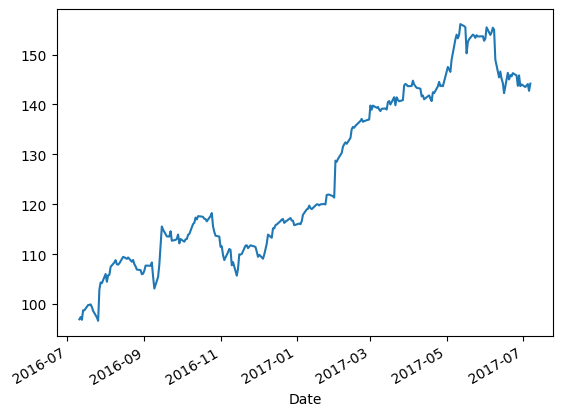

In [21]:
#this is daily data
df.Close.plot()

In [30]:
#Date_Range: Importing file without date 
df2 = pd.read_csv(r"C:\Users\divya\Statistics\Time_Series_DataAnalysis\aapl_no_dates.csv")


In [31]:
#frequency "B" means excluding business days
rng = pd.date_range(start="6/1/2017",end="6/30/2017",freq="B")

In [32]:
rng

DatetimeIndex(['2017-06-01', '2017-06-02', '2017-06-05', '2017-06-06',
               '2017-06-07', '2017-06-08', '2017-06-09', '2017-06-12',
               '2017-06-13', '2017-06-14', '2017-06-15', '2017-06-16',
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', freq='B')

In [34]:
df2.set_index(rng,inplace=True)
df2

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647
2017-06-08,155.25,155.54,154.40,154.99,21250798
2017-06-09,155.19,155.19,146.02,148.98,64882657
2017-06-12,145.74,146.09,142.51,145.42,72307330
2017-06-13,147.16,147.45,145.15,146.59,34165445
2017-06-14,147.50,147.50,143.84,145.16,31531232


<Axes: >

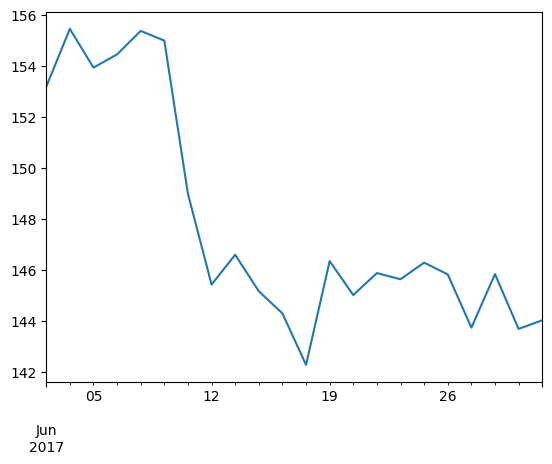

In [36]:
%matplotlib inline
df2.Close.plot()

In [37]:
df2["2017-06-01":"2017-06-10"]

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647
2017-06-08,155.25,155.54,154.40,154.99,21250798
2017-06-09,155.19,155.19,146.02,148.98,64882657


In [38]:
df2["2017-06-01":"2017-06-10"].Close.mean()

153.7642857142857

In [39]:
#asfreq allows to re-generate dataframe as per new frequency: D is for weekend
df.asfreq('D',method='pad')

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-03,153.58,155.45,152.89,155.45,27770715
2017-06-04,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647
2017-06-08,155.25,155.54,154.40,154.99,21250798
2017-06-09,155.19,155.19,146.02,148.98,64882657
2017-06-10,155.19,155.19,146.02,148.98,64882657


In [40]:
#weekly
df.asfreq('W',method='pad')

,Open,High,Low,Close,Volume
2017-06-04,153.58,155.45,152.89,155.45,27770715
2017-06-11,155.19,155.19,146.02,148.98,64882657
2017-06-18,143.78,144.50,142.20,142.27,50361093
2017-06-25,145.13,147.16,145.11,146.28,35439389


In [41]:
#Hourly
df.asfreq('H',method='pad')

C:\Users\divya\AppData\Local\Temp\ipykernel_23780\882857484.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.asfreq('H',method='pad')


,Open,High,Low,Close,Volume
2017-06-01 00:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 01:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 02:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 03:00:00,153.17,153.33,152.22,153.18,16404088
2017-06-01 04:00:00,153.17,153.33,152.22,153.18,16404088
...,...,...,...,...,...
2017-06-29 20:00:00,144.71,145.13,142.28,143.68,31499368
2017-06-29 21:00:00,144.71,145.13,142.28,143.68,31499368
2017-06-29 22:00:00,144.71,145.13,142.28,143.68,31499368
2017-06-29 23:00:00,144.71,145.13,142.28,143.68,31499368


In [44]:
#When we dont know the end_date , specify the periods
rng = pd.date_range(start="01/01/2017",periods=72,freq='H')
rng

C:\Users\divya\AppData\Local\Temp\ipykernel_23780\3208682348.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rng = pd.date_range(start="01/01/2017",periods=72,freq='H')


DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               '2017-01-01 10:00:00', '2017-01-01 11:00:00',
               '2017-01-01 12:00:00', '2017-01-01 13:00:00',
               '2017-01-01 14:00:00', '2017-01-01 15:00:00',
               '2017-01-01 16:00:00', '2017-01-01 17:00:00',
               '2017-01-01 18:00:00', '2017-01-01 19:00:00',
               '2017-01-01 20:00:00', '2017-01-01 21:00:00',
               '2017-01-01 22:00:00', '2017-01-01 23:00:00',
               '2017-01-02 00:00:00', '2017-01-02 01:00:00',
               '2017-01-02 02:00:00', '2017-01-02 03:00:00',
               '2017-01-02 04:00:00', '2017-01-02 05:00:00',
               '2017-01-02 06:00:00', '2017-01-02 07:00:00',
               '2017-01-

In [46]:
#randint() allows to generate radom numbers
import numpy as np
ts = pd.Series(np.random.randint(1,10,len(rng)),index=rng)
ts.head(10)

2017-01-01 00:00:00    4
2017-01-01 01:00:00    8
2017-01-01 02:00:00    7
2017-01-01 03:00:00    2
2017-01-01 04:00:00    1
2017-01-01 05:00:00    5
2017-01-01 06:00:00    6
2017-01-01 07:00:00    9
2017-01-01 08:00:00    7
2017-01-01 09:00:00    8
Freq: h, dtype: int32

In [47]:
#Note: Date_Range() does not handle holidays to calendar & for this we will go with Holidays Clanedar


Pandas Time Series Analysis Tutorial: Handling Holidays

In [75]:
#Date_Range: Importing file without date 
df2 = pd.read_csv(r"C:\Users\divya\Statistics\Time_Series_DataAnalysis\aapl_no_dates.csv")
df2

,Open,High,Low,Close,Volume
0,153.17,153.33,152.22,153.18,16404088
1,153.58,155.45,152.89,155.45,27770715
2,154.34,154.45,153.46,153.93,25331662
3,153.90,155.81,153.78,154.45,26624926
4,155.02,155.98,154.48,155.37,21069647
5,155.25,155.54,154.40,154.99,21250798
6,155.19,155.19,146.02,148.98,64882657
7,145.74,146.09,142.51,145.42,72307330
8,147.16,147.45,145.15,146.59,34165445
9,147.50,147.50,143.84,145.16,31531232


In [76]:
rng = pd.date_range(start="7/1/2017", end="8/4/2017", freq='B')
rng

DatetimeIndex(['2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06',
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20', '2017-07-21', '2017-07-24',
               '2017-07-25', '2017-07-26', '2017-07-27', '2017-07-28',
               '2017-07-31', '2017-08-01', '2017-08-02', '2017-08-03',
               '2017-08-04'],
              dtype='datetime64[ns]', freq='B')

Using 'B' frequency is not going to help because 4th July was holiday and 'B' is not taking that into account. It only accounts for weekends

Using CustomBusinessDay to generate US holidays calendar frequency

In [79]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

#Create a custom business day
us_cal = CustomBusinessDay(calendar=USFederalHolidayCalendar())

rng = pd.date_range(start="7/1/2017",end="8/2/2017", freq=us_cal)
rng

DatetimeIndex(['2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-21', '2017-07-24', '2017-07-25',
               '2017-07-26', '2017-07-27', '2017-07-28', '2017-07-31',
               '2017-08-01', '2017-08-02'],
              dtype='datetime64[ns]', freq='C')

In [80]:
df2.set_index(rng,inplace=True)
df2.head()

,Open,High,Low,Close,Volume
2017-07-03,153.17,153.33,152.22,153.18,16404088
2017-07-05,153.58,155.45,152.89,155.45,27770715
2017-07-06,154.34,154.45,153.46,153.93,25331662
2017-07-07,153.90,155.81,153.78,154.45,26624926
2017-07-10,155.02,155.98,154.48,155.37,21069647


AbstractHolidayCalendar

In [82]:
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday
class myCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('My Birth Day', month=4, day=15),#, observance=nearest_workday),
    ]
    
my_bday = CustomBusinessDay(calendar=myCalendar())
pd.date_range('4/1/2017','4/30/2017',freq=my_bday)

DatetimeIndex(['2017-04-03', '2017-04-04', '2017-04-05', '2017-04-06',
               '2017-04-07', '2017-04-10', '2017-04-11', '2017-04-12',
               '2017-04-13', '2017-04-14', '2017-04-17', '2017-04-18',
               '2017-04-19', '2017-04-20', '2017-04-21', '2017-04-24',
               '2017-04-25', '2017-04-26', '2017-04-27', '2017-04-28'],
              dtype='datetime64[ns]', freq='C')

In [83]:
CustomBusinessDay

pandas._libs.tslibs.offsets.CustomBusinessDay

Weekend in egypt is Friday and Saturday. Sunday is just a normal weekday and you can handle this custom week schedule using CystomBysinessDay with weekmask as shown below

In [85]:
egypt_weekdays = "Sun Mon Tue Wed Thu"

b = CustomBusinessDay(weekmask=egypt_weekdays)

pd.date_range(start="7/1/2017",periods=20,freq=b)

DatetimeIndex(['2017-07-02', '2017-07-03', '2017-07-04', '2017-07-05',
               '2017-07-06', '2017-07-09', '2017-07-10', '2017-07-11',
               '2017-07-12', '2017-07-13', '2017-07-16', '2017-07-17',
               '2017-07-18', '2017-07-19', '2017-07-20', '2017-07-23',
               '2017-07-24', '2017-07-25', '2017-07-26', '2017-07-27'],
              dtype='datetime64[ns]', freq='C')

You can also add holidays to this custom business day frequency

In [86]:
b = CustomBusinessDay(holidays=['2017-07-04', '2017-07-10'], weekmask=egypt_weekdays)

pd.date_range(start="7/1/2017",periods=20,freq=b)

DatetimeIndex(['2017-07-02', '2017-07-03', '2017-07-05', '2017-07-06',
               '2017-07-09', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-16', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-23', '2017-07-24', '2017-07-25',
               '2017-07-26', '2017-07-27', '2017-07-30', '2017-07-31'],
              dtype='datetime64[ns]', freq='C')

Mathematical operations on date object using custom business day

In [87]:
from datetime import datetime
dt = datetime(2017,7,9)
dt

datetime.datetime(2017, 7, 9, 0, 0)

In [88]:
dt + 1*b

Timestamp('2017-07-11 00:00:00')

###### MOST COMMON PROBLEM IN DATA ANALYSIS IS LACK OF UNIFORMITY IN THE STRUCTURE OF INPUT DATA
For example: 5th January ,2017 can be reperrented in different formats

to_datetime() function can help you get this

In [105]:
import pandas as pd

dates = ['2017-01-05', '01/05/2017', '2017.01.05', '2017/01/05', '20170105']

# Specify the format parameter to handle different date formats
converted_dates = pd.to_datetime(dates, errors='coerce')

print(converted_dates)


DatetimeIndex(['2017-01-05', 'NaT', 'NaT', 'NaT', 'NaT'], dtype='datetime64[ns]', freq=None)


Epoch(Unix Time) is number of seconds that have passed since Jan 1 , 1970. 00:00:00 UTC

In [109]:
t = 151013568907
dt = pd.to_datetime([t])

In [110]:
#To convert date tim back to epoch format
dt.view('int64')

array([151013568907], dtype=int64)

Period and PeriodIndex

<b>Pandas Time Series Analysis: Period and PeriodIndex</b>

Yearly Period

In [112]:
import pandas as pd
y = pd.Period('2016')
y

Period('2016', 'Y-DEC')

In [113]:
dir(y)

['__add__',
 '__array_priority__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_add_offset',
 '_add_timedeltalike_scalar',
 '_dtype',
 '_from_ordinal',
 '_maybe_convert_freq',
 '_require_matching_freq',
 'asfreq',
 'day',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'end_time',
 'freq',
 'freqstr',
 'hour',
 'is_leap_year',
 'minute',
 'month',
 'now',
 'ordinal',
 'quarter',
 'qyear',
 'second',
 'start_time',
 'strftime',
 'to_timestamp',
 'week',
 'weekday',
 'weekofyear',
 'year']

In [114]:
y.start_time

Timestamp('2016-01-01 00:00:00')

In [115]:
y.end_time

Timestamp('2016-12-31 23:59:59.999999999')

In [117]:
m= pd.Period('2011-1',freq='M')
m

Period('2011-01', 'M')

In [118]:
m.start_time

Timestamp('2011-01-01 00:00:00')

In [119]:
m.end_time

Timestamp('2011-01-31 23:59:59.999999999')

In [121]:
#Took to next month
m + 1


Period('2011-02', 'M')

In [127]:
d = pd.Period('2017-02-28',freq = 'D')
d

Period('2017-02-28', 'D')

In [129]:
#One Day Addition
d+1

Period('2017-03-01', 'D')

In [130]:
h = pd.Period('2016-02-28 23:00', freq= 'H')
h

C:\Users\divya\AppData\Local\Temp\ipykernel_23780\4036094228.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  h = pd.Period('2016-02-28 23:00', freq= 'H')


Period('2016-02-28 23:00', 'h')

In [131]:
h.start_time

Timestamp('2016-02-28 23:00:00')

In [132]:
h.end_time

Timestamp('2016-02-28 23:59:59.999999999')

In [133]:
h + 1

Period('2016-02-29 00:00', 'h')

In [134]:
#Quarterly Time Period
q = pd.Period('2017Q1')
q

Period('2017Q1', 'Q-DEC')

In [135]:
q+1

Period('2017Q2', 'Q-DEC')

In [136]:
q.start_time

Timestamp('2017-01-01 00:00:00')

In [137]:
q.end_time

Timestamp('2017-03-31 23:59:59.999999999')

In [138]:
q.asfreq('M',how='start')

Period('2017-01', 'M')

In [139]:
#Quarterly Time Period
q = pd.Period('2017Q1', freq ='Q-JAN')
q

Period('2017Q1', 'Q-JAN')

In [140]:
q.start_time

Timestamp('2016-02-01 00:00:00')

In [141]:
q.end_time

Timestamp('2016-04-30 23:59:59.999999999')

In [144]:
#Quarterly Time Period
q2 = pd.Period('2018Q2', freq ='Q-JAN')
q2

Period('2018Q2', 'Q-JAN')

In [147]:
q2-q

<5 * QuarterEnds: startingMonth=1>

In [148]:
idx = pd.period_range('2011','2017',freq='Q-JAN')
idx

PeriodIndex(['2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
             '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3',
             '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1',
             '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3',
             '2017Q4'],
            dtype='period[Q-JAN]')

In [149]:
#randint() allows to generate radom numbers
import numpy as np
ps = pd.Series(np.random.randint(len(idx)),idx)
ps

2011Q4    19
2012Q1    19
2012Q2    19
2012Q3    19
2012Q4    19
2013Q1    19
2013Q2    19
2013Q3    19
2013Q4    19
2014Q1    19
2014Q2    19
2014Q3    19
2014Q4    19
2015Q1    19
2015Q2    19
2015Q3    19
2015Q4    19
2016Q1    19
2016Q2    19
2016Q3    19
2016Q4    19
2017Q1    19
2017Q2    19
2017Q3    19
2017Q4    19
Freq: Q-JAN, dtype: int64

In [150]:
idx[0].start_time

Timestamp('2010-11-01 00:00:00')

In [151]:
idx[0].end_time

Timestamp('2011-01-31 23:59:59.999999999')

In [152]:
import numpy as np
ps = pd.Series(np.random.randn(len(idx)),idx)
ps

2011Q4   -0.868588
2012Q1   -1.204166
2012Q2   -0.638870
2012Q3   -2.371162
2012Q4    0.637074
2013Q1    0.960794
2013Q2    1.125037
2013Q3   -0.519887
2013Q4   -1.873032
2014Q1    0.113225
2014Q2    0.949811
2014Q3   -0.146056
2014Q4   -0.045983
2015Q1   -0.159510
2015Q2    0.648434
2015Q3    2.976776
2015Q4   -0.541265
2016Q1    0.167529
2016Q2   -2.220576
2016Q3    0.753722
2016Q4   -1.150664
2017Q1    1.981497
2017Q2    1.470045
2017Q3   -0.454799
2017Q4   -0.460830
Freq: Q-JAN, dtype: float64

In [154]:
ps.index

PeriodIndex(['2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
             '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3',
             '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1',
             '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3',
             '2017Q4'],
            dtype='period[Q-JAN]')

In [155]:
pst = ps.to_timestamp()
pst

2010-11-01   -0.868588
2011-02-01   -1.204166
2011-05-01   -0.638870
2011-08-01   -2.371162
2011-11-01    0.637074
2012-02-01    0.960794
2012-05-01    1.125037
2012-08-01   -0.519887
2012-11-01   -1.873032
2013-02-01    0.113225
2013-05-01    0.949811
2013-08-01   -0.146056
2013-11-01   -0.045983
2014-02-01   -0.159510
2014-05-01    0.648434
2014-08-01    2.976776
2014-11-01   -0.541265
2015-02-01    0.167529
2015-05-01   -2.220576
2015-08-01    0.753722
2015-11-01   -1.150664
2016-02-01    1.981497
2016-05-01    1.470045
2016-08-01   -0.454799
2016-11-01   -0.460830
Freq: QS-NOV, dtype: float64

In [157]:
pst.index

DatetimeIndex(['2010-11-01', '2011-02-01', '2011-05-01', '2011-08-01',
               '2011-11-01', '2012-02-01', '2012-05-01', '2012-08-01',
               '2012-11-01', '2013-02-01', '2013-05-01', '2013-08-01',
               '2013-11-01', '2014-02-01', '2014-05-01', '2014-08-01',
               '2014-11-01', '2015-02-01', '2015-05-01', '2015-08-01',
               '2015-11-01', '2016-02-01', '2016-05-01', '2016-08-01',
               '2016-11-01'],
              dtype='datetime64[ns]', freq='QS-NOV')

In [161]:
df = pd.read_csv(r"C:\Users\divya\Statistics\Time_Series_DataAnalysis\wmt.csv")
df

,Line Item,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
0,Revenue,115904,120854,118179,130936,117542
1,Expenses,86544,89485,87484,97743,87688
2,Profit,29360,31369,30695,33193,29854


In [162]:
df.set_index('Line Item')

,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
Line Item,,,,,
Revenue,115904,120854,118179,130936,117542
Expenses,86544,89485,87484,97743,87688
Profit,29360,31369,30695,33193,29854


In [163]:
df = df.T
df

,0,1,2
Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [167]:

idx = df.index
idx

Index(['Line Item', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='object')

In [178]:
df.index = pd.PeriodIndex(df.index, freq="Q-JAN")
df

DateParseError: Unknown datetime string format, unable to parse: LINE ITEM

TIME/-ZONE HANDLING